## 导入工具包

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## 导入数据集

In [3]:
# path_1 = '../real_data/data/l_curve.csv'
path_1 = 'dataset/2000-2019_Process_safety_accident_database.xls'
train_data = pd.read_excel(path_1)

In [4]:
train_data.info()
# 查看数据信息，该数据集包含618条数据，一共19列，Dtype数据类型，object是文本类型，int是数值型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   编号      618 non-null    int64         
 1   事故类型    618 non-null    object        
 2   发生时间    618 non-null    datetime64[ns]
 3   发生地点    618 non-null    object        
 4   装置名称    602 non-null    object        
 5   设备名称    616 non-null    object        
 6   设备分类    618 non-null    object        
 7   失效部件    618 non-null    object        
 8   事故原因    617 non-null    object        
 9   事故后果    601 non-null    object        
 10  损失      562 non-null    object        
 11  现有安全措施  437 non-null    object        
 12  链接      617 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 62.9+ KB


In [5]:
train_data.head()
# 查看前五条数据

,编号,事故类型,发生时间,发生地点,装置名称,设备名称,设备分类,失效部件,事故原因,事故后果,损失,现有安全措施,链接
0,1,中毒和窒息事故,2019-12-31,江苏,脱硫塔,脱硫塔,2塔,阀门,3名施工人员进入已经停产的2#脱硫塔设备进行检修作业，意外被困，出现呼吸困难症状。,3人死亡,无,无,http://www.haiyang.gov.cn/art/2020/5/29/art_30...
1,2,火药爆炸事故,2019-12-04,湖南,烟花工房,烟花储存工房,21建筑物及构筑物,违规操作,湖南省相关部门调查认定，这是一起违法违规生产引发，且存在谎报、瞒报和失职渎职行为的重大生产安...,13人死亡，13人受伤,直接经济损失1944.6万元,要依法依规做好事故善后和调查处理工作，深入排查整治烟花爆竹隐患问题和监管漏洞，从严查处烟花爆...,https://baike.baidu.com/item/12%C2%B74%E6%B5%8...
2,3,其他爆炸事故,2019-11-22,山东,输油站,输油管道,6管道与阀门,管道,直接原因:输油管道与排水暗渠交汇处，管道腐蚀减薄，管道破裂，原油泄漏进入排水暗渠及反冲到路面...,62人死亡，136人受伤。,直接经济损失75172万元。,NaN,https://baike.baidu.com/item/11%C2%B722%E9%9D%...
3,4,物体打击事故,2019-11-12,宁夏,履带起重机,履带起重机,16起重运输设备,副臂臂头,（一）直接原因。\r\r\n\r\r 涉事履带起重机安装过程中，安装人员没有对履带起重机安...,5人死亡,直接经济损失850万元,不详,http://www.safehoo.com/Item/5632413.aspx
4,5,触电事故,2019-10-16,广东,电闸,电闸,11电气设备,违规操作,1.直接原因\r\n张某未按正确流程进行通电测试，通电测试前未断开所有设备导致另一路零线前端...,一人死亡,直接损失106万元,1.必须认真吸取事故教训，加强安全管理，全面履行企业安全生产主体责任；\r\n\r\n2.必...,http://dgsafety.dg.gov.cn/ztzl/aqsczdlyxxgkzl/...


## 数据统计及可视化

In [6]:
train_data['事故类型'].value_counts()
# value_counts()函数可以对每个值进行计数并且排序

容器爆炸事故     131
中毒和窒息事故     88
火灾事故        76
瓦斯爆炸事故      55
坍塌事故        46
其他爆炸事故      32
机械伤害事故      28
高处坠落事故      21
锅炉爆炸事故      19
触电事故        16
起重伤害事故      14
车辆伤害事故      14
灼烫事故        13
透水事故        13
冒顶片帮事故      11
其他伤害事故      10
放炮事故        10
物体打击事故       9
火药爆炸事故       7
淹溺事故         5
Name: 事故类型, dtype: int64

### 导入字体

In [7]:
from matplotlib import font_manager
import seaborn as sns
# 添加字体
font_manager.fontManager.addfont('dataset/simsun.ttc') # 这一步不确定苹果系统行不行

# 查看安装的字体
font_family = font_manager.fontManager.ttflist
font_name_list = [i.name for i in font_family]
#for font in font_name_list:
#    print(f'{font}\n')
# 安装好字体后可以正常设置为SimSun
plt.rcParams['font.sans-serif'] = ['SimSun']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimSun')  # 解决Seaborn中文显示问题

In [8]:
train_data['事故类型'].value_counts()
# 对每个值进行计数并且排序

容器爆炸事故     131
中毒和窒息事故     88
火灾事故        76
瓦斯爆炸事故      55
坍塌事故        46
其他爆炸事故      32
机械伤害事故      28
高处坠落事故      21
锅炉爆炸事故      19
触电事故        16
起重伤害事故      14
车辆伤害事故      14
灼烫事故        13
透水事故        13
冒顶片帮事故      11
其他伤害事故      10
放炮事故        10
物体打击事故       9
火药爆炸事故       7
淹溺事故         5
Name: 事故类型, dtype: int64

<AxesSubplot: >

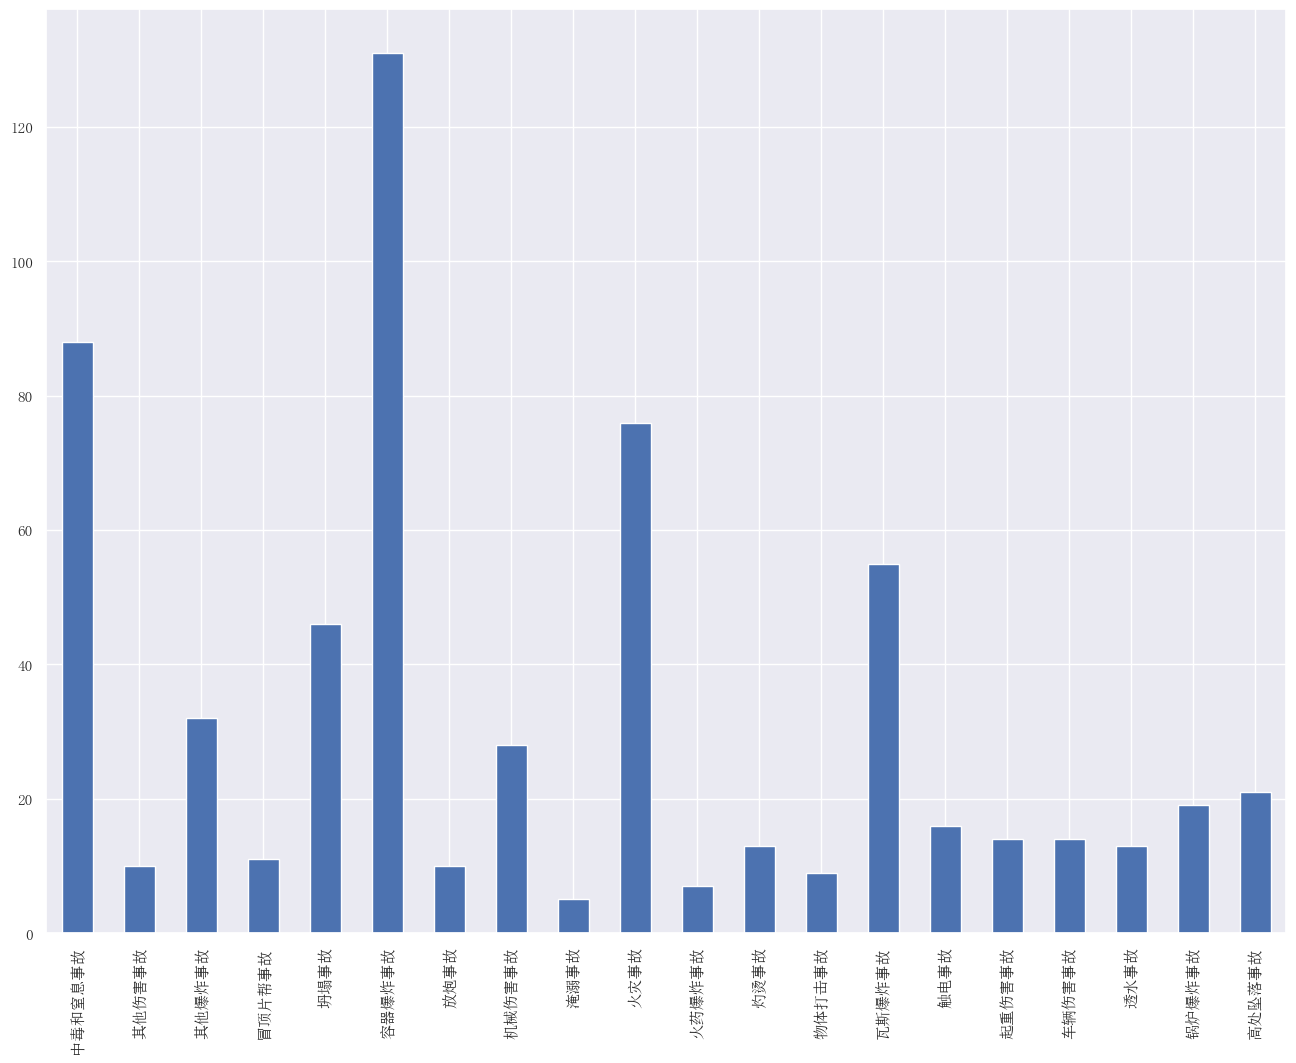

In [9]:
train_data['事故类型'].value_counts().sort_index().plot(kind='bar',figsize=(16,12))
# 根据value_counts()的数值，绘制柱状图

potential errors:

https://blog.csdn.net/qq_46020525/article/details/124470792 (conda install -c anaconda pandas-profiling)

https://stackoverflow.com/questions/14422976/importing-pandas-shows-importerror-cannot-import-name-hashtable (conda update pandas)

In [10]:
train_data['发生地点'].value_counts()

山东     81
河北     68
江苏     62
广东     35
湖南     30
辽宁     27
河南     27
山西     25
吉林     24
浙江     22
北京     20
安徽     20
上海     19
四川     18
江西     15
内蒙古    15
福建     13
贵州     13
陕西     12
黑龙江    12
新疆     10
重庆      9
甘肃      7
湖北      7
云南      6
天津      6
广西      4
海南      3
青海      2
宁夏      2
无       2
沈阳      1
天津市     1
Name: 发生地点, dtype: int64

<AxesSubplot: >

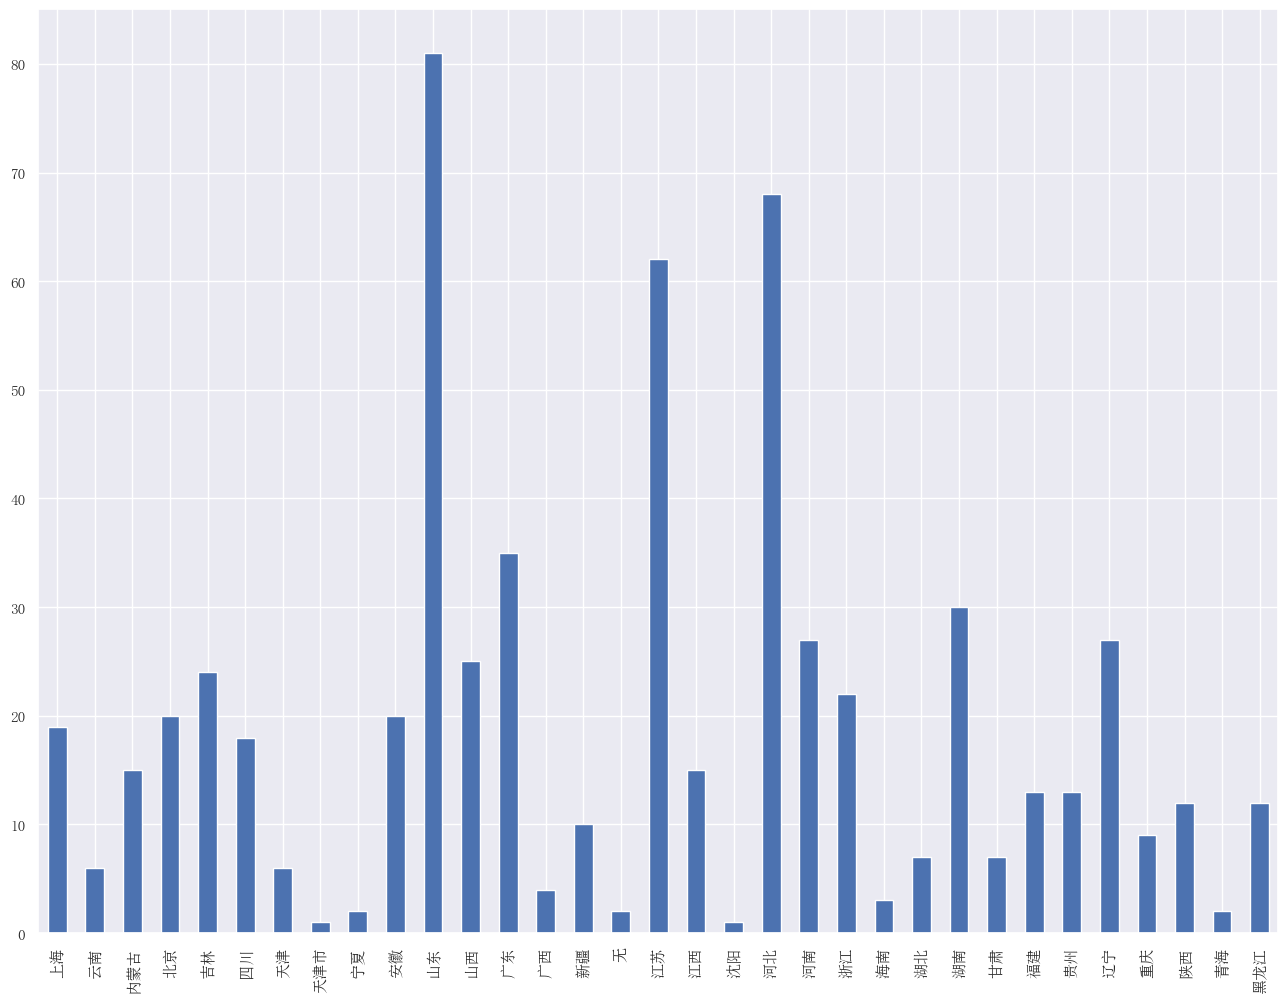

In [11]:
train_data['发生地点'].value_counts().sort_index().plot(kind='bar',figsize=(16,12))

### 日期提取月份

In [12]:
dates = pd.DatetimeIndex(train_data['发生时间'])
# 日期以datetime标准类型进行储存，可以单独提取年、月、日

In [13]:
train_data['发生时间']=dates.month
# 利用datetime函数提取月的功能

In [14]:
train_data.head()

,编号,事故类型,发生时间,发生地点,装置名称,设备名称,设备分类,失效部件,事故原因,事故后果,损失,现有安全措施,链接
0,1,中毒和窒息事故,12,江苏,脱硫塔,脱硫塔,2塔,阀门,3名施工人员进入已经停产的2#脱硫塔设备进行检修作业，意外被困，出现呼吸困难症状。,3人死亡,无,无,http://www.haiyang.gov.cn/art/2020/5/29/art_30...
1,2,火药爆炸事故,12,湖南,烟花工房,烟花储存工房,21建筑物及构筑物,违规操作,湖南省相关部门调查认定，这是一起违法违规生产引发，且存在谎报、瞒报和失职渎职行为的重大生产安...,13人死亡，13人受伤,直接经济损失1944.6万元,要依法依规做好事故善后和调查处理工作，深入排查整治烟花爆竹隐患问题和监管漏洞，从严查处烟花爆...,https://baike.baidu.com/item/12%C2%B74%E6%B5%8...
2,3,其他爆炸事故,11,山东,输油站,输油管道,6管道与阀门,管道,直接原因:输油管道与排水暗渠交汇处，管道腐蚀减薄，管道破裂，原油泄漏进入排水暗渠及反冲到路面...,62人死亡，136人受伤。,直接经济损失75172万元。,NaN,https://baike.baidu.com/item/11%C2%B722%E9%9D%...
3,4,物体打击事故,11,宁夏,履带起重机,履带起重机,16起重运输设备,副臂臂头,（一）直接原因。\r\r\n\r\r 涉事履带起重机安装过程中，安装人员没有对履带起重机安...,5人死亡,直接经济损失850万元,不详,http://www.safehoo.com/Item/5632413.aspx
4,5,触电事故,10,广东,电闸,电闸,11电气设备,违规操作,1.直接原因\r\n张某未按正确流程进行通电测试，通电测试前未断开所有设备导致另一路零线前端...,一人死亡,直接损失106万元,1.必须认真吸取事故教训，加强安全管理，全面履行企业安全生产主体责任；\r\n\r\n2.必...,http://dgsafety.dg.gov.cn/ztzl/aqsczdlyxxgkzl/...


In [15]:
train_data['发生时间'].value_counts()

7     65
8     59
3     57
1     57
4     54
11    53
5     53
12    52
6     48
9     43
2     43
10    34
Name: 发生时间, dtype: int64

<AxesSubplot: >

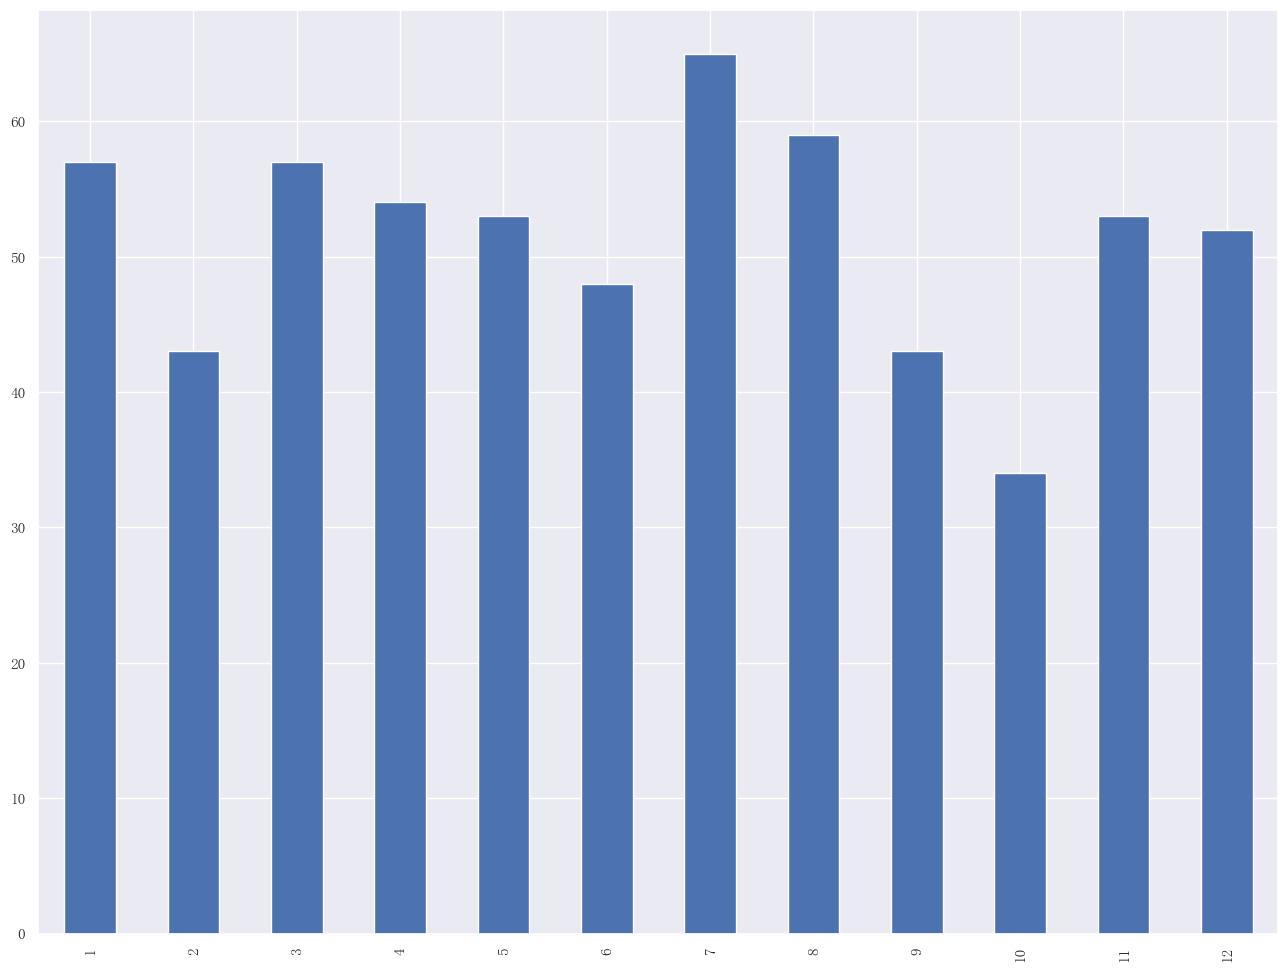

In [16]:
train_data['发生时间'].value_counts().sort_index().plot(kind='bar',figsize=(16,12))

### 列联表

In [17]:
pd.crosstab(train_data['事故类型'],train_data['发生地点'],margins=True).style.background_gradient(cmap='Greens')
# pd.crosstab()函数用于多个组的统计

发生地点,上海,云南,内蒙古,北京,吉林,四川,天津,天津市,宁夏,安徽,山东,山西,广东,广西,新疆,无,江苏,江西,沈阳,河北,河南,浙江,海南,湖北,湖南,甘肃,福建,贵州,辽宁,重庆,陕西,青海,黑龙江,All
事故类型,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
中毒和窒息事故,2,0,0,5,0,2,3,1,0,2,14,3,3,1,0,1,7,1,0,16,4,3,0,2,6,2,2,1,5,0,0,0,2,88
其他伤害事故,0,1,0,2,0,0,0,0,0,1,2,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,10
其他爆炸事故,0,1,1,1,0,1,1,0,0,2,5,1,4,0,1,0,2,0,0,3,1,0,1,0,4,0,2,0,0,0,1,0,0,32
冒顶片帮事故,0,0,0,0,0,0,0,0,0,1,0,2,0,0,2,0,0,0,0,2,1,0,0,0,1,0,1,1,0,0,0,0,0,11
坍塌事故,2,0,0,2,0,0,0,0,0,0,5,3,7,0,0,0,8,1,0,6,1,2,0,0,3,0,1,1,1,1,2,0,0,46
容器爆炸事故,5,1,3,3,9,3,1,0,0,5,29,2,2,2,2,0,13,2,0,9,7,5,1,4,1,1,1,2,11,2,2,1,2,131
放炮事故,0,0,1,0,0,2,0,0,0,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,10
机械伤害事故,1,0,2,1,2,2,0,0,0,2,0,2,2,0,1,0,6,0,0,4,0,2,0,0,0,1,0,0,0,0,0,0,0,28
淹溺事故,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


## 文本分析

In [18]:
import jieba
# jieba分词工具包，中文分词常用的分词工具

In [19]:
train_data=train_data.fillna(value={'设备名称':train_data['设备名称'].mode()[0],'失效部件':train_data['失效部件'].mode()[0],'失效部件':train_data['失效部件'].mode()[0]},inplace=False)
# 缺失值填充，利用DataFrame.fillna()函数，用其他数值替代NaN

'dataset/2000-2019_Process_safety_accident_database.xls'

In [23]:
# 导入停用词
path_2 = 'dataset/stopwords.txt'
stopwords=pd.read_csv(path_2,index_col=False,sep="\t",quoting=3,names=['w'], encoding='utf-8') #list
print(stopwords.head())

    w
0  作业
1  相关
2  组织
3  过程
4  企业


In [24]:
import re # 正则化表达式，主要用于字符串匹配
stop_word = list(stopwords.w)
def cut_word(s):
    """
    分词
    :return:
    """
    #re.sub (pattern, repl, string, count, flags)，其中 pattern, repl, string这三个参数是必选，count, flags这两个参数是可选参数；
    # 去除文本中的英文和数字  [A-z] 等于 [a-zA-Z] 表示匹配所有大小写字母 0-9 表示数字 
    s = re.sub("[a-zA-Z0-9]", " ", str(s))
    s= re.sub("[0-9]"," ", str(s))
    # 去除文本中的中文符号和英文符号 pattern: 正则表达式中的模式字符串；\W 匹配特殊字符，即非字母、非数字、非汉字、非_
    s = re.sub("\W", " ", s)

    # jieba分词
    sentence_seged = jieba.cut(s.strip())
    outstr = ''
    # 去停用词
    for word in sentence_seged:
        if word not in stop_word and word!='' and word!=' ':
            outstr += word
            outstr += " "
    return outstr


train_data['设备分词'] = train_data["设备名称"].apply(cut_word)
train_data['失效部件分词'] = train_data["失效部件"].apply(cut_word)
train_data['原因分词'] = train_data["事故原因"].apply(cut_word)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\shumengl\AppData\Local\Temp\jieba.cache
Loading model cost 1.437 seconds.
Prefix dict has been built successfully.


In [25]:
print(train_data['原因分词'])

0                      施工人员 停产 脱硫 塔 设备 检修 意外 被困 呼吸困难 症状 
1      湖南省 调查 违法 违规 谎报 瞒报 失职 渎职 责任 违纪 违法行为 浏阳市 烟花 制造 ...
2      输油管道 排水 暗渠 交汇处 管道 腐蚀 减薄 管道 破裂 原油 泄漏 排水 暗渠 反冲 路...
3      履带 起重机 安装 安装 人员 履带 起重机 状态 检查 操作 司机 误操作 主臂 端头 下...
4      张某 未 流程 通电 测试 通电 测试 断开 设备 零线 前端 带电 未 确认 人员 远离 ...
                             ...                        
613    班长 擅自改变 施工 方案 采用 规格 方木 支垫 方木 压裂 技术 交底 不清 措施 缺乏...
614    上午 消防队 队长 李 该厂 地下 油池 查看 看后 消防员 杜 提出 条 意见 灯要 换成...
615                                          灌壁 材料 符合标准 
616                                               气体 泄漏 
617    脚手架 立杆 纵距 偏大 未 设置 剪刀 撑 未 设置 扫地 杆 脚手架 整体 稳定性 刚度...
Name: 原因分词, Length: 618, dtype: object


### 基于贝叶斯算法进行事故分类

In [26]:
x = train_data[['设备分词','设备分类','失效部件分词','原因分词']]
y = train_data[['事故类型']]

In [27]:
x['分词']=x[['设备分词','设备分类','失效部件分词','原因分词']].apply(lambda x: ''.join(x), axis=1)
# 新建列['分词']，里面包含['设备分词','失效部件分词','原因分词']

In [28]:
print(x)

          设备分词           设备分类    失效部件分词  \
0        脱硫 塔              2塔       阀门    
1    烟花 储存 工房       21建筑物及构筑物     违规操作    
2        输油管道          6管道与阀门       管道    
3      履带 起重机        16起重运输设备  副 臂 臂 头    
4          电闸          11电气设备     违规操作    
..         ...            ...       ...   
613        降水          6管道与阀门       支护    
614       加热炉   15制造、加工、检维修设备     密封 口    
615     污水 罐体          4储存类容器       灌壁    
616       炼钢炉   15制造、加工、检维修设备       壳体    
617       脚手架       21建筑物及构筑物       钢筋    

                                                  原因分词  \
0                    施工人员 停产 脱硫 塔 设备 检修 意外 被困 呼吸困难 症状    
1    湖南省 调查 违法 违规 谎报 瞒报 失职 渎职 责任 违纪 违法行为 浏阳市 烟花 制造 ...   
2    输油管道 排水 暗渠 交汇处 管道 腐蚀 减薄 管道 破裂 原油 泄漏 排水 暗渠 反冲 路...   
3    履带 起重机 安装 安装 人员 履带 起重机 状态 检查 操作 司机 误操作 主臂 端头 下...   
4    张某 未 流程 通电 测试 通电 测试 断开 设备 零线 前端 带电 未 确认 人员 远离 ...   
..                                                 ...   
613  班长 擅自改变 施工 方案 采用 规格 方木 支垫 方木 压裂 技术 交底 不清 措施 缺乏...   
614  上午 消防队 队长 李 该厂

#### 数据类型转换

In [29]:
# 将事故类型用数值表示，看起来更简约直观
label_mapping = {"车辆伤害事故": 1, "触电事故": 2, "放炮事故": 3, "高处坠落事故": 4, "锅炉爆炸事故":5, "火药爆炸事故": 6,"火灾事故": 7,"机械伤害事故": 8,"冒顶片帮事故": 9,"其他爆炸事故": 10,"其他伤害事故": 11,"起重伤害事故": 12,"容器爆炸事故": 13,"坍塌事故": 14,"透水事故": 15,"瓦斯爆炸事故": 16,"物体打击事故": 17,"淹溺事故": 18,"中毒和窒息事故": 19,"灼烫事故": 20}
y['事故类型'] = y['事故类型'].map(label_mapping) ##变换label
print(y['事故类型'])

0      19
1       6
2      10
3      17
4       2
       ..
613    14
614     5
615    14
616     5
617    14
Name: 事故类型, Length: 618, dtype: int64


#### 划分训练集与测试集

In [30]:
from sklearn.model_selection import train_test_split # 切分数据，train_test_split(test_size, train_size, rondom_state=None, shuffle=True, stratify=None)

# test_size：测试集大小。如果为浮点型，则在0.0-1.0之间，代表测试集的比例；如果为整数型，则为测试集样本的绝对数量；如果没有，则为训练集的补充。默认情况下，值为0.25 。
# rondom_state是随机数的种子，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。

from sklearn import preprocessing # 预处理数据的方法总结（使用sklearn-preprocessing）

In [31]:
# 划分训练集与测试集，默认比例是
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x['分词'].values, y['事故类型'].values, random_state=1)

### 计算词频、TF-IDF值

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer  

#### 词频

In [33]:
#Bag of Words
#Bag of Words（词袋表示），也称为Count Vectors，每个文档的字/词可以使用其出现次数来进行表示。
vectorizer=CountVectorizer(min_df=1)#该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文
x_train_count=vectorizer.fit_transform(x_train)
x_train_word=vectorizer.get_feature_names()#获取词袋模型中的所有词

In [34]:
x_test_count=vectorizer.transform(x_test)
x_test_word=vectorizer.get_feature_names()#获取词袋模型中的所有词

#### TFIDF

In [35]:
#TF-IDF
countfidf = TfidfVectorizer(min_df=3)
x_train_tfidf=countfidf.fit_transform(x_train)
x_train_weight=x_train_tfidf.toarray()#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tfprint(x_train_tfidf)

In [36]:
x_test_tfidf=countfidf.transform(x_test)#第一个fit_transform是计算tf-id
x_test_weight=x_test_tfidf.toarray()#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-id
print(x_test_tfidf)

  (0, 2197)	0.07971950070184602
  (0, 2173)	0.054584730119171386
  (0, 2172)	0.0758622116228909
  (0, 2170)	0.05844201919812651
  (0, 2163)	0.14594508345810528
  (0, 2153)	0.21665679240097863
  (0, 2104)	0.09788144316633349
  (0, 2055)	0.06802182572351635
  (0, 2044)	0.12428697004949159
  (0, 2041)	0.08830874041235481
  (0, 2034)	0.055017109655879755
  (0, 1996)	0.23120535492094238
  (0, 1990)	0.08830874041235481
  (0, 1949)	0.09103162408183998
  (0, 1917)	0.049852779487617724
  (0, 1891)	0.037302192953652946
  (0, 1848)	0.09298128982873563
  (0, 1847)	0.09150755480983158
  (0, 1844)	0.04726468077959065
  (0, 1839)	0.11476616994331318
  (0, 1795)	0.054584730119171386
  (0, 1721)	0.0595794623350265
  (0, 1690)	0.062143485024745794
  (0, 1685)	0.07021820308688626
  (0, 1670)	0.04575377740491579
  :	:
  (154, 1017)	0.049840782300335736
  (154, 996)	0.053619433298579024
  (154, 959)	0.03148697400479538
  (154, 916)	0.047159786751005676
  (154, 914)	0.30923934955123805
  (154, 825)	0.048404

In [37]:
from sklearn.naive_bayes import MultinomialNB  # 使用sklearn中的贝叶斯分类器，并且加载贝叶斯分类器

# 中的MultinomialNB多项式函数
classifier = MultinomialNB()  # 加载多项式函数
classifier.fit(x_train_tfidf, y_train)  # 构造基于数据的分类器
# 分类器属性：MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
y_pred=classifier.predict(x_test_tfidf)
print(y_pred)

[19 19 19 13 13 13 13 13 13 19 13 13 13 19 13 13 13 13 13 13 13 19 13 19
  7 13 16 13 13 13 19 13 13 13 13 13 13 19 13 13 13 16 13 14 13 13 19 16
 13 14  7 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13  7 13 13 13 19 13 13  7 13 13 19 13 19 19 19 13 13 13 13 13 13 13 13
 19 16 13 13 13 19 13 13 13 13 19 16 13 13 13  7 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 16 13 13 13 19 16 13 13 19 13 13  7 13 13 13  7 13
 13 13 19 13 13 13 13 13 13 13 13]


In [38]:
from sklearn.metrics import accuracy_score #准确度
print('模型测试集准确率:%.2f'%accuracy_score(y_test,y_pred))

模型测试集准确率:0.41


### 参数调节

0.6451612903225806 0.031


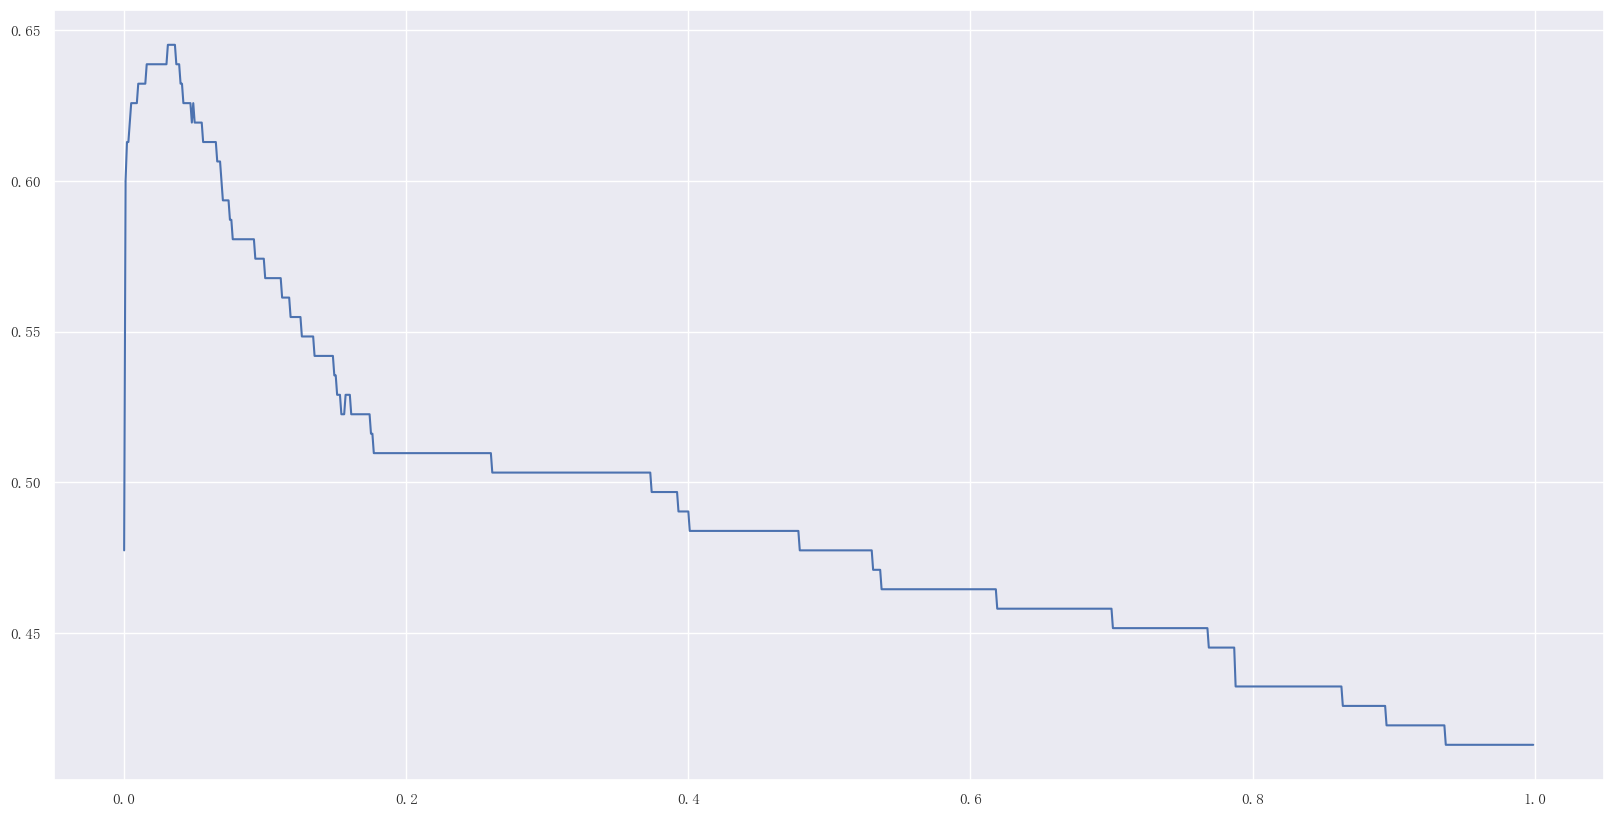

In [39]:
scorel = []
for i in np.arange(0,1,0.001):
    classifier =  MultinomialNB(alpha=i)
    classifier.fit(x_train_tfidf,y_train)
    y_pred=classifier.predict(x_test_tfidf)
    score= accuracy_score(y_test,y_pred).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*0.001))
plt.figure(figsize=[20,10])
plt.plot(np.arange(0,1,0.001),scorel)
plt.show()

0.6129032258064516 0.063


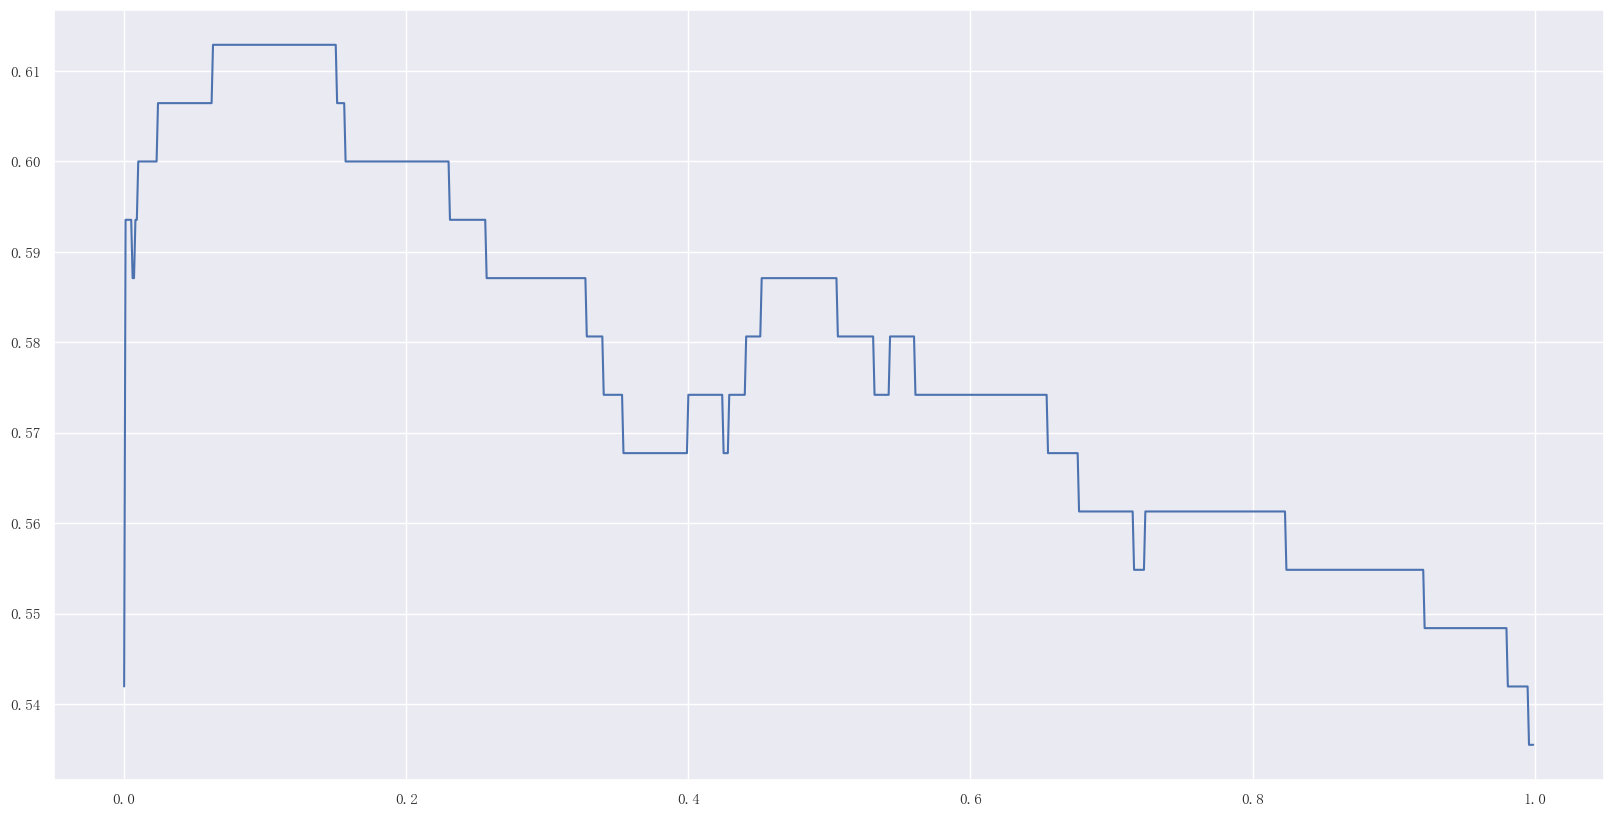

In [40]:
scorel = []
for i in np.arange(0,1,0.001):
    classifier =  MultinomialNB(alpha=i)
    classifier.fit(x_train_count,y_train)
    y_pred=classifier.predict(x_test_count)
    score= accuracy_score(y_test,y_pred).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*0.001))
plt.figure(figsize=[20,10])
plt.plot(np.arange(0,1,0.001),scorel)
plt.show()